In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime

In [4]:
data_airlines = pd.read_csv('airlines.csv', delimiter=',', encoding = 'utf-8')
data_airports = pd.read_csv('airports.csv', delimiter=',', encoding = 'utf-8')
data_flights = pd.read_csv('flights.csv', delimiter=',', encoding = 'utf-8', low_memory=False)

In [5]:
data_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [6]:
data_flights.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,...,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,...,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,...,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,...,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,...,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


In [7]:
data_flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data_airlines.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [9]:
data_airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


#### 1. Подсчитайте количество отменённых рейсов.

In [10]:
# Кол-во отмененных рейсов (у таких рейсов в столбце CANCELLED значение = 1)
cancelled_count = data_flights[data_flights['CANCELLED'] == 1]['CANCELLED'].count()

print('Кол-во отмененных рейсов:', cancelled_count)

Кол-во отмененных рейсов: 89884


#### 2. Определите аэропорт, рейсы для которого отменяются наиболее часто.

In [11]:
# Определим срез данных, содержащий отмененные рейсы
cancelled_data = data_flights[data_flights['CANCELLED'] == 1]

# Сгруппируем данные среза по аэропортам и подсчитаем кол-во рейсов для каждого
airports_counts = cancelled_data.groupby('ORIGIN_AIRPORT').count()

# Найдем аэропорт с максимальным числом отмененных рейсов
airport_max_cancelled = airports_counts['DESTINATION_AIRPORT'].idxmax()

print('Аэропорт с максимальным числом отмененных рейсов:', airport_max_cancelled)

Аэропорт с максимальным числом отмененных рейсов: ORD


#### 3. Определите коэффициент корреляции Пирсона и Спирмена между отменой рейса и днём недели, месяцем, авиакомпанией, аэропортом. Оцените значение p-value. Постройте плотность распределения признаков.

In [12]:
# Выделим уникальные названия авиакомпаний и аэропортов
unique_airlines = sorted(list(set(data_flights['AIRLINE'])))
unique_airports = sorted(list(set(data_flights['ORIGIN_AIRPORT'])))

# Вычисление коэффициентов корреляции Пирсона и значений p-value 
# между отменой рейса и днём недели, месяцем, авиакомпанией, аэропортом
coef_corr_pearson_day, p_value_pearson_day = stats.pearsonr(data_flights['CANCELLED'], data_flights['DAY']) 
coef_corr_pearson_month, p_value_pearson_month = stats.pearsonr(data_flights['CANCELLED'], data_flights['MONTH']) 
coef_corr_pearson_airline, p_value_pearson_airline = stats.pearsonr(data_flights['CANCELLED'], data_flights['AIRLINE'].apply(lambda x: unique_airlines.index(x))) 
coef_corr_pearson_airport, p_value_pearson_airport = stats.pearsonr(data_flights['CANCELLED'], data_flights['ORIGIN_AIRPORT'].apply(lambda x: unique_airports.index(x)))

# Вычисление коэффициентов корреляции Спирмена и значений p-value 
# между отменой рейса и днём недели, месяцем, авиакомпанией, аэропортом
coef_corr_spearman_day, p_value_spearman_day = stats.spearmanr(data_flights['CANCELLED'], data_flights['DAY']) 
coef_corr_spearman_month, p_value_spearman_month = stats.spearmanr(data_flights['CANCELLED'], data_flights['MONTH']) 
coef_corr_spearman_airline, p_value_spearman_airline = stats.spearmanr(data_flights['CANCELLED'], data_flights['AIRLINE'].apply(lambda x: unique_airlines.index(x))) 
coef_corr_spearman_airport, p_value_spearman_airport = stats.spearmanr(data_flights['CANCELLED'], data_flights['ORIGIN_AIRPORT'].apply(lambda x: unique_airports.index(x)))


print('Признаки "Отмена рейса" и "День недели":')
print(f'Коэффициент корреляции Пирсона: {coef_corr_pearson_day}, p-value: {p_value_pearson_day}')
print(f'Коэффициент корреляции Спирмена: {coef_corr_spearman_day}, p-value: {p_value_spearman_day}\n')

print('Признаки "Отмена рейса" и "Месяц":')
print(f'Коэффициент корреляции Пирсона: {coef_corr_pearson_month}, p-value: {p_value_pearson_month}')
print(f'Коэффициент корреляции Спирмена: {coef_corr_spearman_month}, p-value: {p_value_spearman_month}\n')

print('Признаки "Отмена рейса" и "Авиакомпания":')
print(f'Коэффициент корреляции Пирсона: {coef_corr_pearson_airline}, p-value: {p_value_pearson_airline}')
print(f'Коэффициент корреляции Спирмена: {coef_corr_spearman_airline}, p-value: {p_value_spearman_airline}\n')

print('Признаки "Отмена рейса" и "Аэропорт":')
print(f'Коэффициент корреляции Пирсона: {coef_corr_pearson_airport}, p-value: {p_value_pearson_airport}')
print(f'Коэффициент корреляции Спирмена: {coef_corr_spearman_airport}, p-value: {p_value_spearman_airport}\n')

Признаки "Отмена рейса" и "День недели":
Коэффициент корреляции Пирсона: -0.0035366477945536785, p-value: 1.4458965804640992e-17
Коэффициент корреляции Спирмена: -0.003494529234935195, p-value: 3.462699133343376e-17

Признаки "Отмена рейса" и "Месяц":
Коэффициент корреляции Пирсона: -0.055043060010365734, p-value: 0.0
Коэффициент корреляции Спирмена: -0.0551329617621633, p-value: 0.0

Признаки "Отмена рейса" и "Авиакомпания":
Коэффициент корреляции Пирсона: 0.004359972463785533, p-value: 7.174621549530358e-26
Коэффициент корреляции Спирмена: 0.0050961678376882, p-value: 9.822977461217948e-35

Признаки "Отмена рейса" и "Аэропорт":
Коэффициент корреляции Пирсона: 0.013248131507266675, p-value: 3.9798705130355787e-224
Коэффициент корреляции Спирмена: 0.006906929486073159, p-value: 2.4918100216920145e-62



<AxesSubplot:>

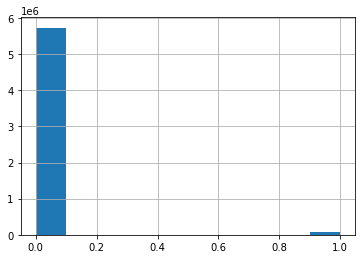

In [13]:
# Гистограмма для признака CANCELLED
data_flights['CANCELLED'].hist()

<AxesSubplot:>

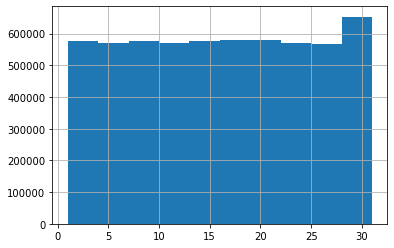

In [14]:
# Гистограмма для признака DAY
data_flights['DAY'].hist()

<AxesSubplot:>

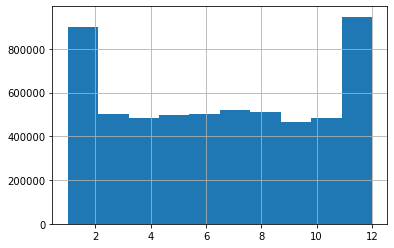

In [15]:
# Гистограмма для признака MONTH
data_flights['MONTH'].hist()

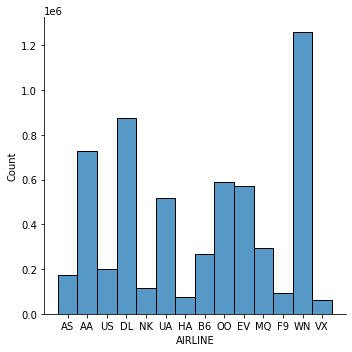

In [16]:
# Гистограмма для признака AIRLINE
sns.displot(data_flights['AIRLINE'])

<Figure size 864x720 with 0 Axes>

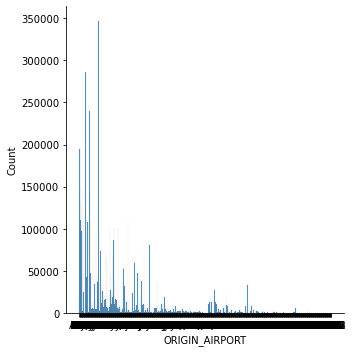

In [22]:
# Гистограмма для признака ORIGIN_AIRPORT
plt.figure(figsize=(12,10))
sns.displot(data_flights['ORIGIN_AIRPORT'])

#### 4. Подсчитайте для трёх выбранных авиакомпаний: количество рейсов, количество отменённых рейсов, количество перенаправленных рейсов.

In [16]:
# Определяем первые 3 авиакомпании из таблицы
airlines = list(data_airlines['IATA_CODE'][:3])

print('Выбранные авиакомпании:', airlines)

Выбранные авиакомпании: ['UA', 'AA', 'US']


In [17]:
# Цикл по выбранным авиакомпаниям
for airline in airlines:
    
    # Определяем срез данных по авиакомпании
    data_slice = data_flights[data_flights['AIRLINE'] == airline]
    
    # Подсчитываем общее кол-во рейсов
    total = len(data_slice)
    
    # Подсчитываем кол-во отмененных рейсов
    cancelled = len(data_slice[data_slice['CANCELLED']==1])
    
    # Подсчитываем кол-во перенаправленных рейсов
    diverted = len(data_slice[data_slice['DIVERTED']==1])
    
    print('Авиакомпания', airline)
    print('Общее кол-во рейсов:', total)
    print('Кол-во отмененных рейсов:', cancelled)
    print('Кол-во перенаправленных рейсов:', diverted, '\n')

Авиакомпания UA
Общее кол-во рейсов: 515723
Кол-во отмененных рейсов: 6573
Кол-во перенаправленных рейсов: 1388 

Авиакомпания AA
Общее кол-во рейсов: 725984
Кол-во отмененных рейсов: 10919
Кол-во перенаправленных рейсов: 2130 

Авиакомпания US
Общее кол-во рейсов: 198715
Кол-во отмененных рейсов: 4067
Кол-во перенаправленных рейсов: 425 



#### 5. Определите скорость полёта для каждого рейса, скорость полёта среднюю для трёх выбранных авиакомпаний.

In [18]:
# Если считать, что в столбце DISTANCE указано расстояние между двумя аэропортами, а в стоблце AIR_TIME - время, затраченное 
# на перелет, то скорость будет равна DISTANCE / AIR_TIME


# Определим скорость для каждого рейса
speed = data_flights['DISTANCE'] / data_flights['AIR_TIME']
print('Скорость полета каждого рейса:\n', speed)

Скорость полета каждого рейса:
 0          8.568047
1          8.859316
2          8.631579
3          9.077519
4          7.276382
             ...   
5819074    9.599265
5819075    8.292308
5819076    8.111675
5819077    8.256944
5819078    8.338624
Length: 5819079, dtype: float64


In [19]:
# Добавим столбец со скоростями в таблицу с данными
data_flights.insert(0, 'Speed', speed)

In [20]:
# Определяем первые 3 авиакомпании из таблицы (аналогично предыдущему заданию)
airlines = list(data_airlines['IATA_CODE'][:3])
print('Выбранные авиакомпании:', airlines, '\n')

# Цикл по выбранным авиакомпаниям
for airline in airlines:
    
    # Определяем срез данных по авиакомпании
    data_slice = data_flights[data_flights['AIRLINE'] == airline]
    
    # Рассчитываем среднюю скорость
    average_speed = data_slice['Speed'].mean()
    
    print('Авиакомпания', airline)
    print('Средняя скорость полета:', average_speed, '\n')

Выбранные авиакомпании: ['UA', 'AA', 'US'] 

Авиакомпания UA
Средняя скорость полета: 7.445885845432049 

Авиакомпания AA
Средняя скорость полета: 7.127988899717048 

Авиакомпания US
Средняя скорость полета: 6.851808262868271 



#### 6. Визуализируйте тепловую карту частоты отмены рейсов. По одной оси – дни, по другой оси – рейс (для двух аэропортов).

In [21]:
# Определяем первые 2 аэропорта из таблицы 
airports = list(data_airports['IATA_CODE'][:2])
print('Выбранные аэропорты:', airports)

Выбранные аэропорты: ['ABE', 'ABI']


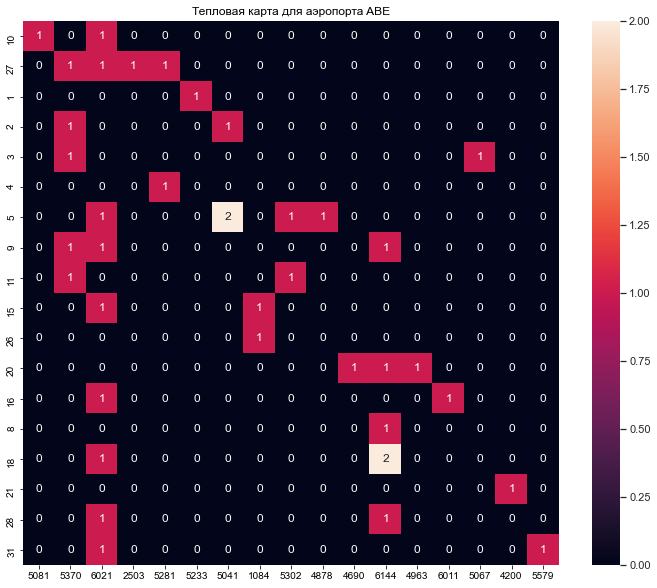

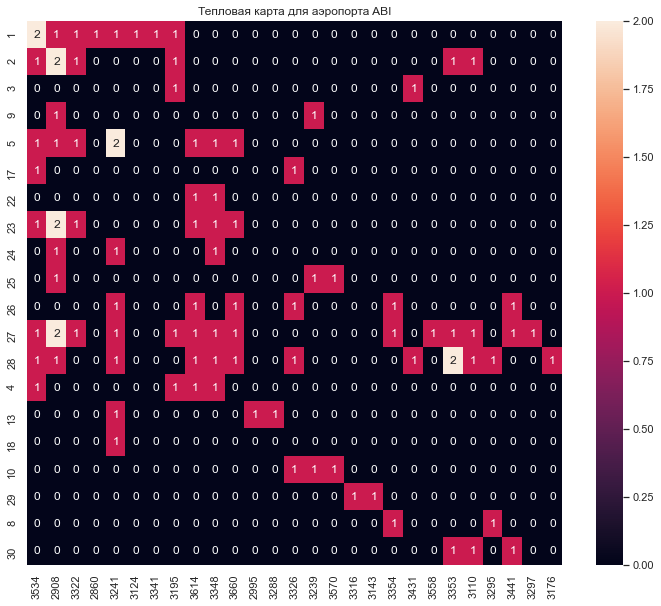

In [22]:
# Цикл по выбранным аэропортам
for airport in airports:
    
    # Определяем срез данных - отбираем строки с указанным аэропортом с отмененными рейсами
    data_slice = data_flights[(data_flights['ORIGIN_AIRPORT'] == airport) & (data_flights['CANCELLED'] == 1)]
    
    # Определяем список уникальных дней и список уникальных рейсов для среза
    unique_days = list(data_slice['DAY'].unique())
    unique_flight_number = list(data_slice['FLIGHT_NUMBER'].unique())
    
    # Группируем срез по дням и рейсам (т.е., например, день 2 + рейс 5370, день 2 + рейс 5041 и т.д.), 
    # подсчитываем частоту рейсов по каждой группе 
    # и берем ключи (день + номер рейса) и значения (кол-во рейсов)
    keys = list(data_slice.groupby(['DAY', 'FLIGHT_NUMBER']).count()['YEAR'].keys())
    values = list(data_slice.groupby(['DAY', 'FLIGHT_NUMBER']).count()['YEAR'])
    
    # Создаем двумерный массив нулей размерностью (кол-во уникальных дней Х кол-во уникальных рейсов)
    # Этот массив будет содержать кол-во рейсов для каждого дня по каждому рейсу. 
    # Если таких вылетов не было, то значение в соответствующей ячейке = 0    
    data_matrix = np.zeros((len(unique_days), len(unique_flight_number)))
    
    # Заполняем массив найденными ранее значениями
    for k,v in zip(keys, values):
        day, number = k[0], k[1]    
        data_matrix[unique_days.index(day), unique_flight_number.index(number)] = v
        
    # Отрисовываем тепловую карту
    plt.figure(figsize=(12,10))
    plt.title('Тепловая карта для аэропорта '+airport)
    sns.set(font_scale=1.0) 
    sns.heatmap(data_matrix, annot = True, xticklabels=unique_flight_number, yticklabels=unique_days)
    

#### 7. Посчитайте и визуализируйте время задержки отправки и прибытия по трём аэропортам.

In [23]:
# Определяем первые 3 аэропорта из таблицы 
airports = list(data_airports['IATA_CODE'][:3])
print('Выбранные аэропорты:', airports)

Выбранные аэропорты: ['ABE', 'ABI', 'ABQ']


In [24]:
# Определяем списки, которые будут содержать суммарное время задержек для 3х аэропортов (пока пустые)
total_departure_delay_time, total_arrival_delay_time = [], []

# Цикл по выбранным аэропортам
for airport in airports:
    
    # Определяем срез данных - отбираем строки с указанным аэропортом с отмененными рейсами
    data_slice = data_flights[data_flights['ORIGIN_AIRPORT'] == airport]
    
    # Подсчитываем суммарное время задержки отправления и прибытия по срезу данных
    departure_delay = data_slice['DEPARTURE_DELAY'].sum()
    arrival_delay = data_slice['ARRIVAL_DELAY'].sum()
    
    # Записываем найденное время задержек в соответствующий списки
    total_departure_delay_time.append(departure_delay)
    total_arrival_delay_time.append(arrival_delay)

Text(0.5, 1.0, 'Суммарное время задержек прибытия для 3х аэропортов')

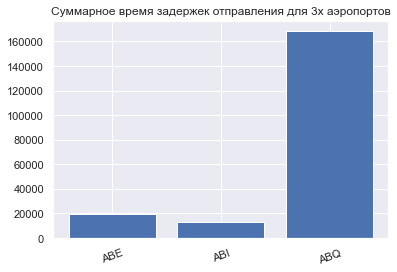

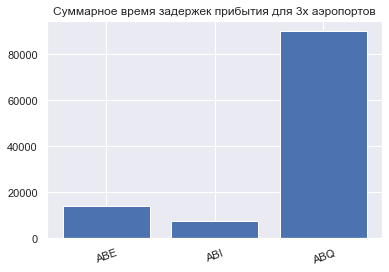

In [25]:
# Отрисовываем диаграммы
fig, ax = plt.subplots()
ax.bar(airports, total_departure_delay_time)
plt.xticks(rotation=20)
plt.title('Суммарное время задержек отправления для 3х аэропортов')


fig, ax = plt.subplots()
ax.bar(airports, total_arrival_delay_time)
plt.xticks(rotation=20)
plt.title('Суммарное время задержек прибытия для 3х аэропортов')

#### 8. Определите для трёх выбранных аэропортов и визуализируйте задержки по каждой причине.

In [26]:
# Игнорирование SettingWithCopyWarning
import warnings
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [27]:
# Определяем первые 3 аэропорта из таблицы 
airports = list(data_airports['IATA_CODE'][:3])
print('Выбранные аэропорты:', airports)

Выбранные аэропорты: ['ABE', 'ABI', 'ABQ']


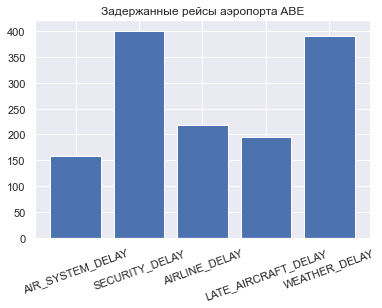

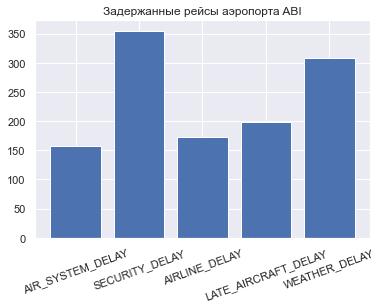

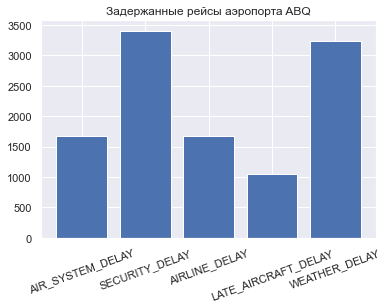

In [28]:
# Цикл по выбранным аэропортам
for airport in airports:
    
    # Определяем срез данных - отбираем строки с указанным аэропортом с отмененными рейсами
    data_slice = data_flights[data_flights['ORIGIN_AIRPORT'] == airport]
    
    # Т.к. не указано какие графики нужно отобразить, 
    # то будем рисовать столбчатые диаграммы с кол-вом задержанных рейсов по каждой причине
    
    # Заменим в столбцах с задержками 0 на NaN
    data_slice.loc[data_slice['AIR_SYSTEM_DELAY'].gt(0), 'AIR_SYSTEM_DELAY'] = np.nan
    data_slice.loc[data_slice['SECURITY_DELAY'].gt(0), 'SECURITY_DELAY'] = np.nan
    data_slice.loc[data_slice['AIRLINE_DELAY'].gt(0), 'AIRLINE_DELAY'] = np.nan
    data_slice.loc[data_slice['LATE_AIRCRAFT_DELAY'].gt(0), 'LATE_AIRCRAFT_DELAY'] = np.nan
    data_slice.loc[data_slice['WEATHER_DELAY'].gt(0), 'WEATHER_DELAY'] = np.nan
    
    # Подсчитаем кол-во рейсов с задержками по каждой причине
    delay_counts = [data_slice['AIR_SYSTEM_DELAY'].count(),
                    data_slice['SECURITY_DELAY'].count(),
                    data_slice['AIRLINE_DELAY'].count(),
                    data_slice['LATE_AIRCRAFT_DELAY'].count(),
                    data_slice['WEATHER_DELAY'].count()]
    
    # Создаем список причин задержки
    delay_reasons = ['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
    
    # Отрисовываем диаграммы
    fig, ax = plt.subplots()
    ax.bar(delay_reasons, delay_counts)
    plt.xticks(rotation=20)
    plt.title('Задержанные рейсы аэропорта ' + airport)
    

#### 9. Определите авиакомпанию с максимальными задержками рейсов по отправке и прибытию

In [29]:
# Находим максимальную задержку отправления и максимальную задержку прибытия
max_departure_delay = data_flights['DEPARTURE_DELAY'].max()
max_arrival_delay = data_flights['ARRIVAL_DELAY'].max()

# Определяем авиакомпании с максимальными задержками
airline_max_departure_delay = list(data_flights[data_flights['DEPARTURE_DELAY'] == max_departure_delay]['AIRLINE'])[0]
airline_max_arrival_delay = list(data_flights[data_flights['ARRIVAL_DELAY'] == max_arrival_delay]['AIRLINE'])[0]

print('Авиакомпания с максимальной задержкой отправления рейсов:', airline_max_departure_delay)
print('Авиакомпания с максимальной задержкой прибытия рейсов:', airline_max_arrival_delay)

Авиакомпания с максимальной задержкой отправления рейсов: AA
Авиакомпания с максимальной задержкой прибытия рейсов: AA
